In [54]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

import random

### Function Implementation
The Schwefel function is a continuous, multimodal, non-convex, deceptive (many local optima), and N-dimensional function with a global minimum of 0.

> $f_{schwefel}(x_1, x_2, ... x_N) = 418.98291 N - \sum_{i=1}^N x_i sin(\sqrt {|x_i|})$

It takes in N random numbers in a pre-defined range, processes them through the formula above, and returns a value. For example, if $N = 2$, we might randomly generate numbers $x_1 = 0$ and $x_2 = 0$, plug them into the Schwefel function, and get a value of 837.96582.

### Genetic Algorithm Goal
The goal of this project is to build a Genetic Algorithm such that, for some given number range for N random numbers, we can find a combination of N numbers to yield a value of 0 or close to 0 when inputted into our Schwefel function.

In [2]:
def schwefel(num_list):  
    return (418.98291*len(num_list)) - np.sum([x*np.sin(np.sqrt(np.absolute(x)))for x in num_list])

In [3]:
schwefel([0,0])

837.96582

Due to floating point errors, we can't *really* hit 0 consistently as `np.sin(np.pi)` yields $1.22\times10^{-16}$ where it should be 0. The value is, however, small enough to be negligible in the grand scheme of things, though.

### Quick Visualization
We can plot the full extent of the Schwefel function's range for $N = 2$ by plotting the Schwefel function value of every combination of those two numbers onto a third axis to make a 3-Dimensional visualization of the Schwefel fitness landscape.

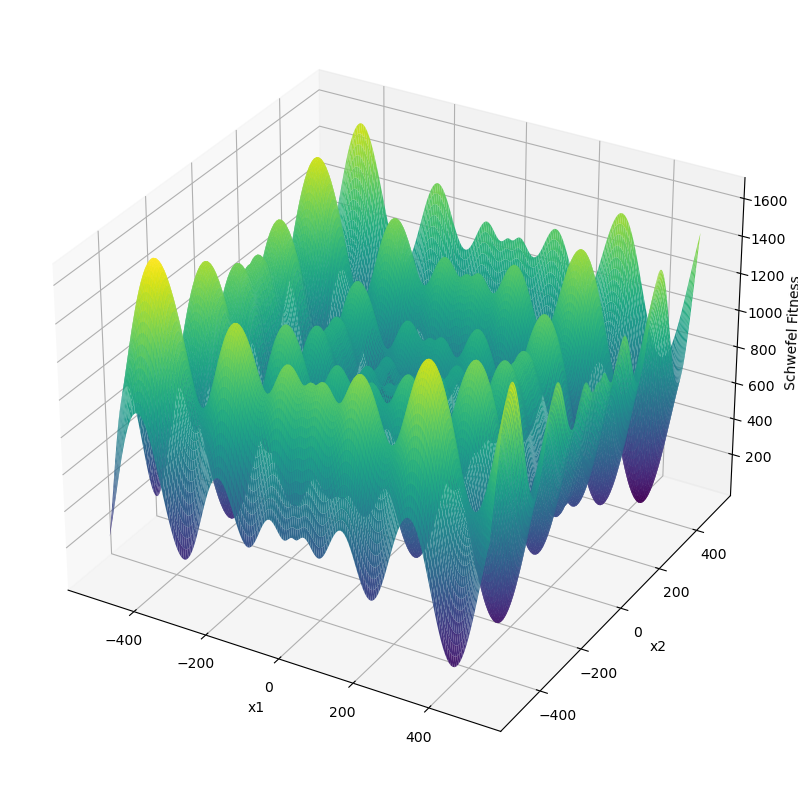

In [18]:
# Visualization of 2-Dimensional Schwefel function (3-D Fitness landscape visualization)
# Schwefel function modified for graphing convenience
def schwefel2(x, y):  
    return (418.98291*2) - ((x*np.sin(np.sqrt(np.absolute(x))))+(y*np.sin(np.sqrt(np.absolute(y)))))

x1 = np.linspace(-512, 512, 200)
x2 = np.linspace(-512, 512, 200)

X1, X2 = np.meshgrid(x1, x2)
results = schwefel2(X1, X2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, results, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Schwefel Fitness')
plt.show()

In [ ]:
# TODO: population and survivor selection operators, termination.

## Real-Valued GA Approach
- Representation and Population: 100 randomly generated lists of 10 real numbers.
- Parents selected via Tournament Selection (n=2)
- Crossover (Pc = 0.9): Uniform, Whole Arithmetic
- Mutation (Pm = 1/10 = 0.1): Uniform
- Survivor Selection: Parents+Offspring
- Run for 500 generations and see how close we get.

In [57]:
# Population Init for 100 randomly generated genotypes
population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

# This line sorts our population by the values of its schwefel fitness value
population.sort(key=schwefel)
# Access scores via [schwefel(i) for i in population]

In [72]:
# Mutation Operator - Mutating each number in a chromosome by drawing from a range of [x-creep, x+creep]
# Maxs and Mins used to make sure the numbers don't go out of bounds.

# Toggle parameters here (e.g.: creep = +-128 to cover 25% of possible number range)
creep = 128
mrate = 0.1 # Per bit

# Takes in one chromosome and mutates each gene
def mutate(geno):
    return [random.uniform(max(-512, i-creep), min(512, i+creep)) if(random.uniform(0,1)<=mrate) else i for i in geno]
# Mutate with [mutate(i) for i in population]

In [81]:
# Crossover Operator - Taking 2 chromosomes and doing uniform whole arithmetic recombination

# Uniform, so crossover parameter is 0.5. Takes equal influence from both parents, returns identical children
alpha = 0.5
xrate = 0.9 # Per crossover operation, else copy parents

# Takes in two chromosomes and returns two new chromosomes
def cross(geno1, geno2):
    if(random.uniform(0,1)<=xrate):
        child1 = [alpha*geno1[i]+(1-alpha)*geno2[i] for i in range(len(geno1))]
        child2 = [alpha*geno2[i]+(1-alpha)*geno1[i] for i in range(len(geno2))]
        return [child1, child2]
    return [geno1, geno2]
# Add to population with population+cross(a,b)

In [82]:
# Parent Selector - 

[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0], [2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 2, 3, 2, 3, 2, 3, 2, 3], [2.0, 2.0, 3.0, 3.0, 4.

In [84]:
# Survival Selector - Parents and Offsprings competing together
psize = 100

# Deterministic selection: Just picks Top 100
def det_surv(population):
    return population[:psize]

# Stochastic selection: Semi-randomly pick survivors

## Binary GA Approach
- Representation and Population: 100 randomly generated lists of 10 binary numbers.
- Parents selected via Tournament Selection (n=2)
- Crossover (Pc = 0.9): Uniform, 2-Point
- Mutation (Pm = 1/100 = 0.01): Bit-flip
- Survivor Selection: Parents+Offspring
- Run for 500 generations and see how close we get.

In [83]:
# TODO: Pop init, cross, mutate, parent sel, survivor sel, terminate

In [50]:
a = '-'+''.join(str(random.randint(0, 1)) for i in range(9))

In [51]:
a

'-111011000'

In [52]:
int(a)

-111011000